In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.ndimage import convolve

plt.rcParams['image.interpolation'] = 'none'

In [20]:
# define raw array

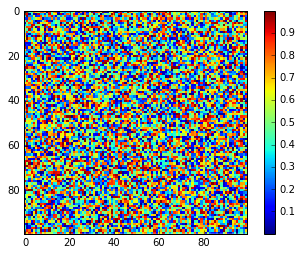

In [55]:
raw_data = np.random.rand(100,100)
plt.imshow(raw_data)
plt.colorbar()

In [56]:
# adding gamma peaks

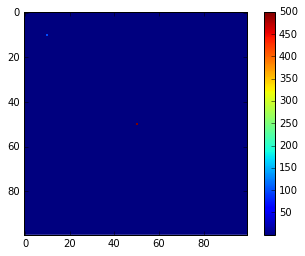

In [57]:
raw_data[50,50] = 500
raw_data[10,10] = 100

plt.imshow(raw_data)
plt.colorbar()

In [58]:
print("before")
print(raw_data[50,50])

before
500.0


In [42]:
# locate where are the highest counts

In [43]:
mean_counts = np.mean(raw_data)
print(mean_counts)
threshold = 10/100 # if 10% of intensity is still > mean_counts -> remove it

0.563361256161


In [44]:
position = []
[height, width] = np.shape(raw_data)
for _x in np.arange(width):
    for _y in np.arange(height):
        if raw_data[_y,_x] * threshold > mean_counts:
            position.append([_y, _x])

In [63]:
mean_kernel = np.array([[1,1,1],[1,0,1],[1,1,1]]) / 8.0
convolved_data = convolve(raw_data, mean_kernel, mode='constant')

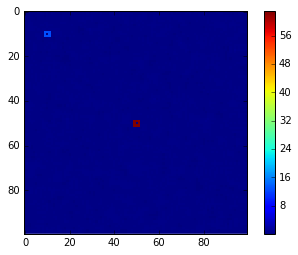

In [66]:
plt.imshow(convolved_data)
plt.colorbar()


In [69]:
print("After")
print(convolved_data[50,50])
print(convolved_data[10,10])

After
0.578328755255
0.45823504015


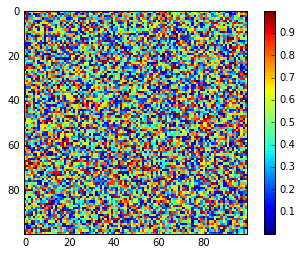

In [72]:
new_raw_data = np.copy(raw_data)
for _coordinates in position:
    [_y, _x] = _coordinates
    new_raw_data[_y, _x] = convolved_data[_y, _x]
    
plt.imshow(new_raw_data)
plt.colorbar()
